# Imports

## Libraries

In [148]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

## Data

In [149]:
provinces_gdf = gpd.read_file("../data/provinces_gdf.geojson", driver='geojson')

# Province level Plotting

## Distribution of Province Populations

The Mean Province Population is 570758.0


<AxesSubplot:ylabel='Population'>

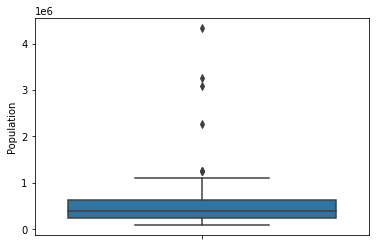

In [150]:
# most regions have around half a million
print(f"The Mean Province Population is {round(provinces_gdf.Population.mean(),0)}")
sns.boxplot(data = provinces_gdf, y='Population')

## Choropleth Map

<AxesSubplot:>

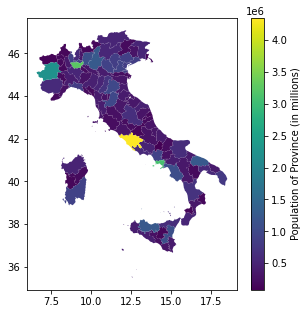

In [151]:
provinces_gdf.plot(column = 'Population', figsize=(5, 5), legend=True,
                  legend_kwds={'label':"Population of Province (in millions)"})

## Cartogram

### Basic Cartogram

Text(0.5, 1.0, 'Basic Cartogram of Italian Provinces')

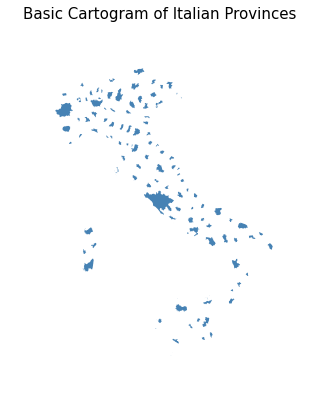

In [152]:
gplt.cartogram(provinces_gdf, scale='Population', projection=gcrs.AlbersEqualArea(), figsize=(7,7))
plt.title("Basic Cartogram of Italian Provinces", fontdict={"fontsize":15})

#### Side by Side

In [155]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Original versus Population Cartogram of Italian Provinces', fontweight="bold", fontsize=15)
# gplt.cartogram(provinces_gdf, scale='Population', projection=gcrs.AlbersEqualArea(), figsize=(7,7), ax=ax1)
# gplt.polyplot(provinces_gdf, facecolor='white', edgecolor='grey', ax=ax2)
# # plt.savefig("../blog/South_Sardinia.png", bbox_inches='tight')

### More Complex Cartogram

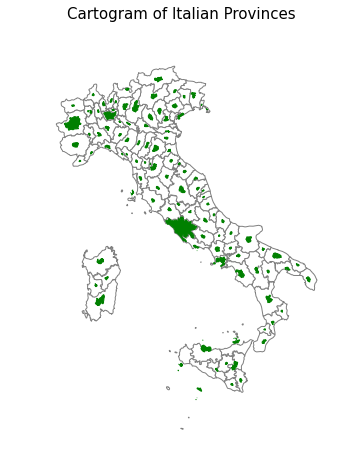

In [156]:
ax1 = gplt.cartogram(provinces_gdf, scale='Population', projection=gcrs.AlbersEqualArea(), 
                     figsize=(8,8), limits=(0.1, .9), color = 'green')
gplt.polyplot(provinces_gdf, facecolor='white', edgecolor='grey', ax=ax1)
ax1.set_title("Cartogram of Italian Provinces", fontdict={"fontsize":15})
plt.savefig("../images/province_cartogram_and_choropleth_basic.png", bbox_inches='tight', pad_inches=0.2)

### Cartogram / Choropleth Map

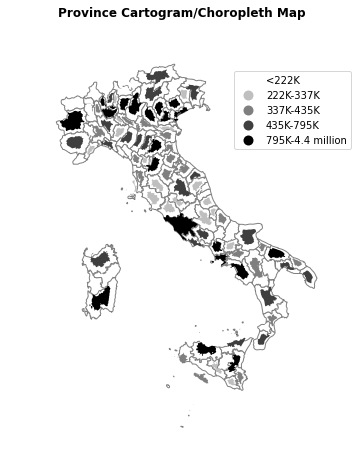

In [157]:
scheme = mc.Quantiles(provinces_gdf['Population'], k=5)
ax2 = gplt.cartogram(
    provinces_gdf, scale='Population', projection=gcrs.AlbersEqualArea(), figsize=(10, 8),
    legend=True, legend_kwargs={'bbox_to_anchor': (1, 0.9)}, legend_var='hue',
    hue='Population', scheme=scheme, cmap='gist_yarg', limits=(0.5, 1),
    legend_labels=[
        '<222K', '222K-337K', '337K-435K',
        '435K-795K', '795K-4.4 million'
    ]
)
ax2.set_title("Cartogram/Choropleth of Italy Provinces", fontdict={'fontsize':16, 'fontweight':'bold'})
gplt.polyplot(provinces_gdf, facecolor='white', edgecolor='grey', ax=ax2)
plt.title("Province Cartogram/Choropleth Map", fontdict={'fontweight':'bold'})
# plt.legend(['Green = weighted mean pop. centroid', 'black is geographic centroid'])
plt.savefig("../images/province_cartogram_and_choropleth.png", bbox_inches='tight', pad_inches=0.2)

### how much larger is the Rome Province than Sardinia?

In [158]:
sardinia_population = provinces_gdf[provinces_gdf['Region'] == 'Sardinia'].Population.sum()
rome_pop = provinces_gdf[provinces_gdf['Province'] == 'Rome']['Population'].values[0]
rome_pop / sardinia_population

2.4388461933783674

### How many provinces does it take to cover half of the population

In [159]:
provinces_gdf_pop_sort = provinces_gdf.sort_values(by='Population', ascending=False)

In [160]:
### iteratively add them until you have 30.2 million
pop_sum = 0
counter = 0
total_pop = provinces_gdf.Population.sum()
for pop in provinces_gdf_pop_sort['Population']:
    if pop_sum < (total_pop / 2):
        pop_sum += pop
        counter += 1
    else:
        break

In [161]:
# you only need 22 provinces to reach half of the italian population
print(f"The number of provinces to cover half of the population is: {counter}")
print(f"The total number of provinces is: {provinces_gdf.shape[0]}")

The number of provinces to cover half of the population is: 22
The total number of provinces is: 106


#### Displaying most populous regions only

<GeoAxesSubplot:>

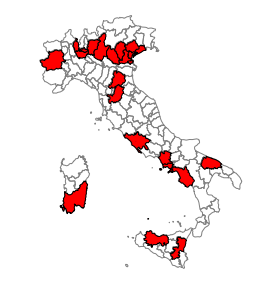

In [162]:
ax3 =  gplt.polyplot(provinces_gdf_pop_sort, projection=gcrs.AlbersEqualArea(), edgecolor = 'gray',
                    figsize = (5,5))
gplt.polyplot(
    provinces_gdf_pop_sort[0:21], projection=gcrs.AlbersEqualArea(), ax=ax3, facecolor='red'
)

#### What percent of the land area is needed to cover half of the population

In [163]:
# by total area covered in most dense regions
provinces_gdf_dense_sort

,Code,name,Province,Region,Macroregion,Population,Area,Density,Country,Cultural_region,Pop_weighted_lat,Pop_weighted_lon,geometry
56,NA,Napoli,Naples,Campania,South,3084890,1171,2631,Italy,South,4.424970e+07,1.260185e+08,"MULTIPOLYGON (((13.94467 40.70161, 13.93483 40..."
48,MB,Monza e Brianza,Monza and Brianza,Lombardy,North-West,873935,405,2098,Italy,North,8.100265e+06,3.987966e+07,"POLYGON ((9.48277 45.67178, 9.49644 45.64525, ..."
51,MI,Milano,Milan,Lombardy,North-West,3250315,1575,2004,Italy,North,2.963878e+07,1.477707e+08,"POLYGON ((9.49644 45.64525, 9.51775 45.62425, ..."
95,TS,Trieste,Trieste,Friuli-Venezia Giulia,North-East,234493,212,1116,Italy,North,3.227768e+06,1.071250e+07,"POLYGON ((13.58851 45.80648, 13.60917 45.79860..."
78,RM,Roma,Rome,Lazio,Centre,4342212,5352,784,Italy,Center,5.458119e+07,1.820276e+08,"POLYGON ((12.77441 41.42094, 12.76295 41.42137..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,SO,Sondrio,Sondrio,Lombardy,North-West,181095,3210,57,Italy,North,1.795554e+06,8.384374e+06,"POLYGON ((9.22483 46.23119, 9.23972 46.26700, ..."
59,OR,Oristrano,Oristano,Sardinia,Insular,157707,2990,53,Italy,South,1.375412e+06,6.306455e+06,"POLYGON ((8.54852 39.69791, 8.56577 39.70108, ..."
38,GR,Grosseto,Grosseto,Tuscany,Centre,221629,4501,51,Italy,Center,2.491959e+06,9.483316e+06,"MULTIPOLYGON (((10.89584 42.38670, 10.91346 42..."
3,AO,Aoste,Aosta,Aosta Valley,North-West,125666,3261,39,Italy,North,9.262818e+05,5.746727e+06,"POLYGON ((7.02208 45.92526, 7.06694 45.89022, ..."


In [164]:
### iteratively add them until you have 30.2 million
pop_sum = 0
counter = 0
area_counter = 0
area_sum = 0
total_area = provinces_gdf.Area.sum()
total_pop = provinces_gdf.Population.sum()
for idx, row in provinces_gdf_dense_sort.iterrows():
    if pop_sum < (total_pop / 2):
        pop_sum += row['Population']
        area_sum += row['Area']
        counter += 1
    else:
        break

In [165]:
# you only need 20% of the area of Italy to cover half of the population
round(area_sum / total_area, 3) * 100

20.3

In [166]:
# using most populous regions
# You only need 22.2 percent of the land to cover 50 percent of the population of Italy!
pct_of_land_half_pop = round(provinces_gdf_pop_sort[0:21].Area.sum() / \
                             provinces_gdf_pop_sort.Area.sum(), 3) * 100
print(pct_of_land_half_pop)

22.2


## Density Cartograms

Text(0.5, 1.0, 'Basic Cartogram of the Density of Italian Provinces')

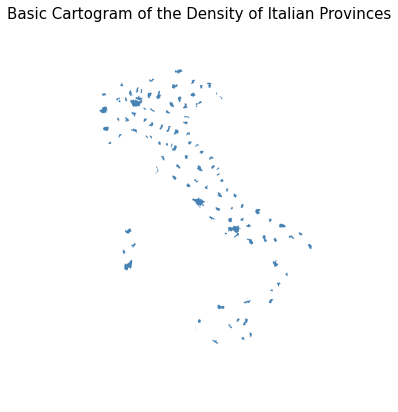

In [167]:
gplt.cartogram(provinces_gdf, scale='Density', projection=gcrs.AlbersEqualArea(), figsize=(7,7))
plt.title("Basic Cartogram of the Density of Italian Provinces", fontdict={"fontsize":15})

Text(0.5, 1.0, 'A Cartogram of the Density of Italian Provinces')

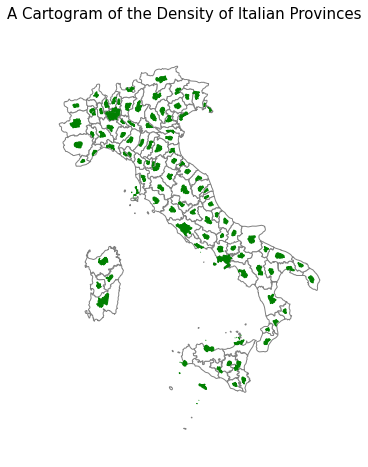

In [168]:
# we can see that almost all regions appear rural compared to the most dense provinces
ax35 = gplt.cartogram(provinces_gdf, scale='Density', projection=gcrs.AlbersEqualArea(), 
                     figsize=(8,8), limits=(0.25, 1), color = 'green')
gplt.polyplot(provinces_gdf, facecolor='white', edgecolor='grey', ax=ax35)
ax35.set_title("A Cartogram of the Density of Italian Provinces", fontdict={"fontsize":15})

### Density Comparison: Sardinia versus Naples

In [169]:
sardinia_population = provinces_gdf[provinces_gdf['Region'] == 'Sardinia'].Population.sum()

region_dens = provinces_gdf.dissolve('Region', aggfunc='mean')

sard_density = region_dens[region_dens.index == 'Sardinia']['Density'].values[0]
naples_density = provinces_gdf[provinces_gdf['Code'] == 'NA'].Density.sum()

In [170]:
# naples province is 21 times more dense than sardinia! 
round(naples_density / sard_density, 1)

21.1

In [171]:
# is sicily more dense than sardinia?...Yes, but not by much
sicily_density = region_dens[region_dens.index == 'Sicily']['Density'].values[0]
round(sicily_density / sard_density, 1)

1.5

# Region

In [172]:
# combining the geometries and populations of the data by region
region_geometries = provinces_gdf.dissolve(by='Region', aggfunc='sum')

### Distribution of Region populations

<AxesSubplot:xlabel='Region', ylabel='Population'>

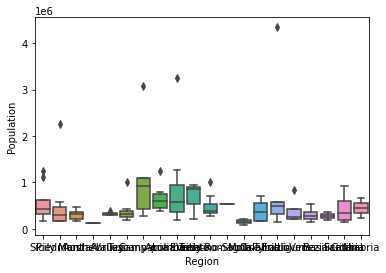

In [173]:
# all regions have major outliers except for Insular (Islands) and the North-East
sns.boxplot(data = provinces_gdf, x='Region', y='Population')

### Choropleth

<AxesSubplot:>

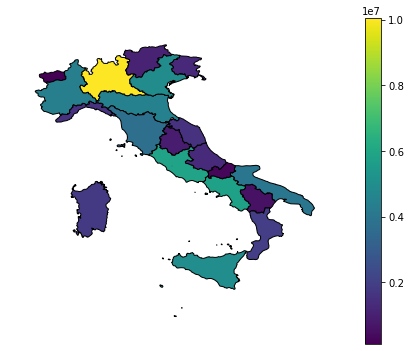

In [174]:
# Lombardy (in yellow) is clearly the largest region
gplt.choropleth(region_geometries, hue='Population', legend=True)

### Cartogram

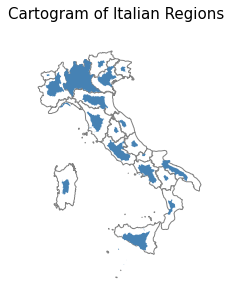

In [175]:
# We can see that Sicily, Lombardy, Lazio, Venice, and Campania are the largest regions
ax4 = gplt.cartogram(region_geometries, scale='Population', projection=gcrs.AlbersEqualArea(), 
                    figsize = (5,5))
gplt.polyplot(region_geometries, facecolor='white', edgecolor='grey', ax=ax4)
# plt.title("Region Cartogram")
plt.title("Cartogram of Italian Regions", fontdict={"fontsize":15})
plt.savefig("../images/region_cartogram.png", bbox_inches='tight', pad_inches=0.2)

In [176]:
smallest_region = region_geometries.Population.min()
region_geometries[region_geometries.Population == smallest_region]

,geometry,Population,Area,Density,Pop_weighted_lat,Pop_weighted_lon
Region,,,,,,
Aosta Valley,"POLYGON ((7.02208 45.92526, 7.06694 45.89022, ...",125666,3261,39,926281.791085,5.746727e+06


In [177]:
largest_region = region_geometries.Population.max()
region_geometries[region_geometries.Population == largest_region]

,geometry,Population,Area,Density,Pop_weighted_lat,Pop_weighted_lon
Region,,,,,,
Lombardy,"POLYGON ((10.66176 45.41903, 10.68740 45.42385...",10060574,23856,7301,9.514325e+07,4.586168e+08


In [178]:
largest_region / smallest_region

80.0580427482374

# Macroregion

## Macroregions' Population

In general, Italy can be divided into 5 regions: North-East, North-West, Centre, South, and Insular (Islands). I would like to see how these regions appear on the map

In [179]:
# combining the geometries and populations of the data by macroregion
macro_geometries = provinces_gdf.dissolve(by='Macroregion', aggfunc='sum')

### Distribution of macroregion populations

<AxesSubplot:xlabel='Macroregion', ylabel='Population'>

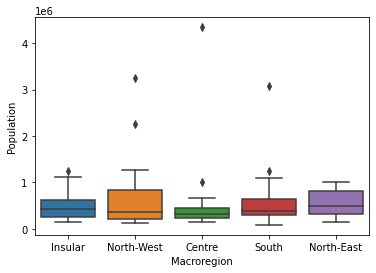

In [180]:
# all regions have major outliers except for Insular (Islands) and the North-East
sns.boxplot(data = provinces_gdf, x='Macroregion', y='Population')

### Choropleth

<AxesSubplot:>

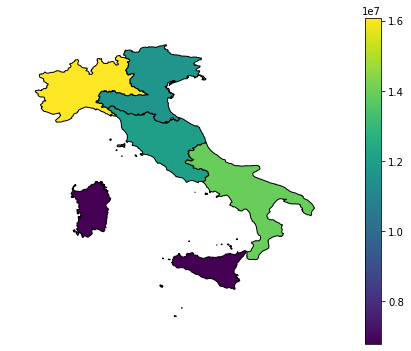

In [181]:
gplt.choropleth(macro_geometries, hue='Population', legend=True)

### Cartogram

<GeoAxesSubplot:>

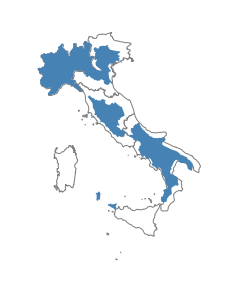

In [182]:
# Two things are abundantly clear:
## 1. The Insular region is the smallest
## 2. The North-West is the largest
ax4 = gplt.cartogram(macro_geometries, scale='Population', projection=gcrs.AlbersEqualArea(), 
                    figsize = (5,5))
gplt.polyplot(macro_geometries, facecolor='white', edgecolor='grey', ax=ax4)

# Cultural Regions

Often, Italy is divided into 2, sometimes 3, regions: the North, (Centre), and the South. I would like to see how these regions appear on the map

In [183]:
cultural_geometries = provinces_gdf.dissolve(by='Cultural_region', aggfunc='sum')

### Distribution of province populations

<AxesSubplot:xlabel='Cultural_region', ylabel='Population'>

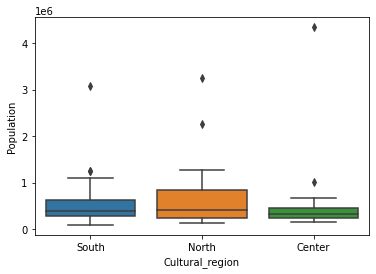

In [184]:
# all regions have major outliers except for Insular (Islands) and the North-East
sns.boxplot(data = provinces_gdf, x='Cultural_region', y='Population')

### Choropleth

<AxesSubplot:>

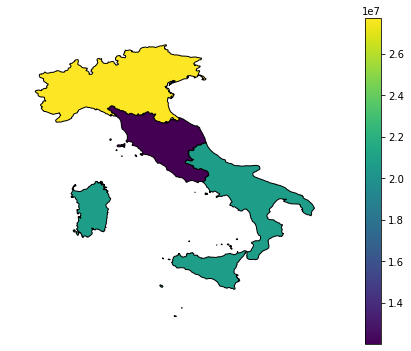

In [185]:
gplt.choropleth(cultural_geometries, hue='Population', legend=True)

### Cartogram

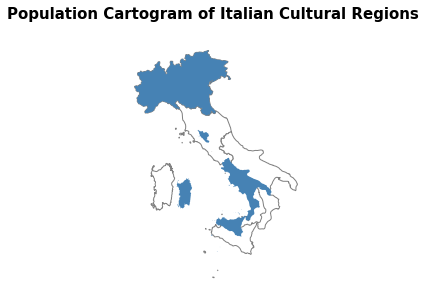

In [191]:
# The North comes out on top again! In this comparison, the center comes out in last
ax5 = gplt.cartogram(cultural_geometries, scale='Population', projection=gcrs.AlbersEqualArea(), 
                    figsize = (5,5))
gplt.polyplot(cultural_geometries, facecolor='white', edgecolor='grey', ax=ax5)
plt.title("Population Cartogram of Italian Cultural Regions", fontweight='bold', fontsize=15)
plt.savefig("../images/Cultural_region_cartogram.png", bbox_inches='tight')

#### Cultural Regions Cartogram by Density

In [187]:
#is it the case that the center is really that unpopulated, or is it because it has less area, in general?

<GeoAxesSubplot:>

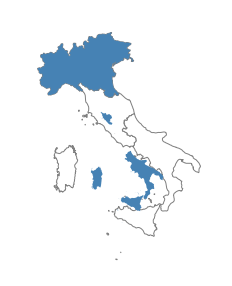

In [188]:
# No difference in the center, but the South is much less dense than the north! 
ax6 = gplt.cartogram(cultural_geometries, scale='Density', projection=gcrs.AlbersEqualArea(), 
                    figsize = (5,5))
gplt.polyplot(cultural_geometries, facecolor='white', edgecolor='grey', ax=ax6)

#### Plotting Density and Population Together

In [189]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('"South_Sardinia" Conversion', fontweight="bold", fontsize=15)
# prov_gdf[prov_gdf['Code'] == 'South_Sardinia'].plot(ax=ax1)
# provinces_data_gdf[provinces_data_gdf['Code'] == 'South_Sardinia'].plot(ax=ax2)
# plt.savefig("../blog/South_Sardinia.png", bbox_inches='tight')